<p align="center"> 
  <img src="https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/74df4373452141.5c09935c47fde.jpg" alt="HAR Logo" width="80px" height="80px"/>
</p>
<h2 align="center"> Improve Boxing By Micael Illos </h1>
<br/>
<h4 align="center"> A machine learning project that aims on helping boxers improve thier skills by analyzing how well they will do a against a certain opponent </h3>  

<br/>
<br/>

<p align="center"> 
  <img src="https://media1.tenor.com/images/e9d9d40eef4ab994670c08524e35bbdb/tenor.gif" alt="Sample signal" width="70%" height="70%">
</p>




## Table Of Contents
<ul class="toc"><ul class="toc"><li><a href="#Get-Data">I. Get Data<a class="anchor-link" href="#Get-Data">¶</a></a></li><ul class="toc"><li><a href="#Preproccessing-the-Data">I. Preproccessing the Data<a class="anchor-link" href="#Preproccessing-the-Data">¶</a></a></li><li><a href="#Data-Wrangaling">II. Data Wrangaling<a class="anchor-link" href="#Data-Wrangaling">¶</a></a></li><li><a href="#Cleaning-Data">III. Cleaning Data<a class="anchor-link" href="#Cleaning-Data">¶</a></a></li><li><a href="#Split-Data">IV. Split Data<a class="anchor-link" href="#Split-Data">¶</a></a></li><li><a href="#Encode%2C-Impute-%26-Normalize">V. Encode, Impute &amp; Normalize<a class="anchor-link" href="#Encode,-Impute-&amp;-Normalize">¶</a></a></li></ul><li><a href="#Machine-Learning-Models">II. Machine Learning Models<a class="anchor-link" href="#Machine-Learning-Models">¶</a></a></li><ul class="toc"><li><a href="#Decision-Tree">I. Decision Tree<a class="anchor-link" href="#Decision-Tree">¶</a></a></li><li><a href="#Random-Forest">II. Random Forest<a class="anchor-link" href="#Random-Forest">¶</a></a></li><li><a href="#K-Nearest-Neighbours">III. K Nearest Neighbours<a class="anchor-link" href="#K-Nearest-Neighbours">¶</a></a></li><li><a href="#Support-Vector-Machine">IV. Support Vector Machine<a class="anchor-link" href="#Support-Vector-Machine">¶</a></a></li><li><a href="#Best-Model">V. Best Model<a class="anchor-link" href="#Best-Model">¶</a></a></li></ul><li><a href="#Appendix">III. Appendix<a class="anchor-link" href="#Appendix">¶</a></a></li></ul></ul>

### Abstract
Taking into consideration the characteristics of machine learning techniques and the great diversity of applications that have been promoted by it, the aim of the present work is the implementation of machine learning techniques to generate a model that can predict the winner in a Boxing (Classical Boxing) based on the stats of the fighters by employing the available database presented.
<p align="center"> 
  <img src="../Assets/ML_Steps_Overview.png" width=400px />
</p>

In [21]:
# Here sit all the imports
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# Data cleaning (normalization and such)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import category_encoders as ce #https://contrib.scikit-learn.org/category_encoders/


# Model imports
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Training model and accuracy stuff
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

MODELS = {}
TEST_SIZE = 0.3


## Get Data
Okay so we need to get some data of boxing fights. This is not easy hence since 1994
after Foreman recapturing the heavyweight championship 20 years after the
Rumble. Boxing results soon moved off the nation's sports pages,
and reporters no longer covered the sport regularly. Basiclly boxing has been declining in popularity expecially compared to ufc. After checking kaggle for premade datasets or any other usefull datascience resource site none were found therefore a custom built dataset will be used.

There is a useful website that contains data of pro boxing fights: https://boxrec.com 

### Preproccessing the Data

After the scaping (see scripts folder) we are left with a csv that contains all the boxers profiles and another csv containing all their fights so the following function merges them accordingly.

In [22]:
def build_data():
    boxers = pd.read_csv('./boxers.csv')
    fights = pd.read_csv('./fights.csv')
    final = pd.merge(fights, boxers, how='left', left_on='opponent_0_br_id', right_on='br_id')
    final = pd.merge(final.drop_duplicates(), boxers, how='left', left_on='opponent_br_id', right_on='br_id')
    return final

Data wrangling—also called data cleaning, data remediation, or data munging—refers to a variety of processes designed to transform raw data into more readily used formats.
So the following function wrangles the data.

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features for use in model construction.
So the following function will also remove unnecessary features and only leave the relevant features for the predictive model.

### Data Wrangaling

In [23]:
def wrangle_data(df):
    # Drop columns and map merged column names to new ones
    # Feature Selection
    # For example: alias is the boxers nickname which we will drop because its not relevant 
    # rename opponent 1 and 2 to left side of ring and right side
  df.drop(columns=['alias_y',
                  'alias_x',
                  'birth name_x',
                  'birth name_y',
                  'birth place_y',
                  'birth place_x',
                  'bouts_x',
                  'bouts_y',
                  'br_id_y',
                  'br_id_x',
                  'career_y',
                  'career_x',
                  'draws_y',
                  'draws_x',
                  'losses_y',
                  'losses_x',
                  'manager/agent_y',
                  'manager/agent_x',
                  'name_y',
                  'name_x',
                  'promoter_y',
                  'promoter_x',
                  'residence_y',
                  'residence_x',
                  'rounds_y',
                  'rounds_x',
                  'sex_x',
                  'status_y',
                  'status_x',
                  'titles held_y',
                  'titles held_x',
                  'wins_y',
                  'wins_x'],
            inplace=True)
# instead of using opponent and opponent_0 we will map to left and right
  mapping = {
    'opponent': 'left',
    'opponent_0': 'right',
    'opponent_0_br_id': 'right_br_id',
    'opponent_br_id': 'left_br_id',
    'height': 'left_height',
    'nationality': 'left_nationality',
    'reach': 'left_reach',
    'born_x': 'right_born',
    'debut_x': 'right_debut',
    'decision': 'right_decision',
    'stance_x': 'right_stance',
    'born_y': 'left_born',
    'debut_y': 'left_debut',
    'stance_y': 'left_stance',
    'sex_y': 'sex',
    'division_x': 'right_division',
    'division_y': 'left_division',
    'height_x': 'right_height',
    'height_y': 'left_height',
    'reach_x': 'right_reach',
    'reach_y': 'left_reach',
    'nationality_x': 'right_nationality',
    'nationality_y': 'left_nationality',
    'w-l-d': 'left_record_at_fight_time'
    }
  df.rename(columns=mapping, inplace=True)
# Set right's age in the right format regarding to age and born columns
  right_born = df['right_born'].str.split(pat=' / ', expand=True)
  df['right_born'] = right_born[0]
  df['right_age'] = right_born[1].str.split(expand=True)[1]

# Set lefts's age in the right format regarding to age and born columns
  left_born = df['left_born'].str.split(pat=' / ', expand=True)
  df['left_born'] = left_born[0]
  df['left_age'] = left_born[1].str.split(expand=True)[1]

  df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

 # Set values to datetime
  df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
  df['right_born'] = pd.to_datetime(df['right_born'], format='%Y-%m-%d', errors='coerce')
  df['left_born'] = pd.to_datetime(df['left_born'], format='%Y-%m-%d', errors='coerce')
  df['right_debut'] = pd.to_datetime(df['right_debut'], format='%Y-%m-%d', errors='coerce')
  df['left_debut'] = pd.to_datetime(df['left_debut'], format='%Y-%m-%d', errors='coerce')

 # set height value correctly
  df['right_height'] = df['right_height'].str.split(pat='/', expand=True)[1]
  df['left_height'] = df['left_height'].str.split(pat='/', expand=True)[1]

#set reach value correctly
  df['right_reach'] = df['right_reach'].str.split(pat='/', expand=True)[1]
  df['left_reach'] = df['left_reach'].str.split(pat='/', expand=True)[1]

# set age at fight time and years active values
  df['right_age_at_fight_time'] = (df['date'] - df['right_born'])
  df['right_years_active'] = (df['date'] - df['right_debut'])
  df['left_age_at_fight_time'] = (df['date'] - df['left_born'])
  df['left_years_active'] = (df['date'] - df['left_debut'])

# drop duplicates
  df = df.drop_duplicates()

#dropna
  df = df.dropna(subset=['date'])

  return df

The functions sets the right record to left

In [24]:
def right_rec_to_left(df):
    common = np.intersect1d(df['right_br_id'], df['left_br_id'])
    common = pd.Series(common)
    df = df[df['right_br_id'].isin(common)]
    for i in df['date']:
        grouped = df.groupby('date').get_group(i)
        df['right_record_at_fight_time'] = grouped['right_br_id'].apply(lambda x: grouped.loc[grouped["left_br_id"] == x, "left_record_at_fight_time"].values)

    return df

Call the following functions to prepare data

In [25]:
data = build_data()
data = wrangle_data(data)
#data = right_rec_to_left(data)

Save the preproccesed data to csv

In [26]:
data.to_csv(r'./dataset.csv', index=False, mode='w', na_rep='NaN')

### Cleaning Data

In [27]:
dataset = pd.read_csv('./dataset.csv')

In [28]:
dataset = dataset.drop(columns=['left_record_at_fight_time'])
dataset.shape

(113161, 30)

In [29]:
dataset = dataset[(dataset['right_decision'] == 'W') | (dataset['right_decision'] == 'L') | (dataset['right_decision'] == 'D')]

### Split Data

In [30]:
target = 'right_decision'
X = dataset.drop([target], axis=1)
y = dataset[target]

Separate train and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In this section we are encoding the target labels with the label encoder and we are also encoding categorial features, imputing missing values and normalizing (standardizing) features
and after that we are left with the transformed X_train and X_test

### Encode, Impute & Normalize

In [32]:
le = preprocessing.LabelEncoder() # Encode target labels with value between 0 and n_classes-1.
ny = le.fit_transform(y)
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
pipeline = make_pipeline( # Construct a Pipeline from the given estimators.
    ce.OrdinalEncoder(), # Encode categorical features as an integer array. (auto) 
    SimpleImputer(), # Imputation transformer for completing missing values (default is mean)
    preprocessing.StandardScaler() # Standardize features by removing the mean and scaling to unit variance
)
nX = pipeline.fit_transform(X)
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)


/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Some functions for cross validation plotting and learning curve plotting

In [33]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
    # function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_random_forest(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = RandomForestClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

    # function for fitting knn of various amount of neighbours
    # on the training data using cross-validation
def run_cross_validation_on_knn(X, y, amount_of_neighbours, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for aon in amount_of_neighbours:
        knn_model = KNeighborsClassifier(n_neighbors=aon)
        cv_scores = cross_val_score(knn_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(knn_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
# function for fitting svm of various c's on the training data using cross-validation
def run_cross_validation_on_svm(svc_model, X, y, c_list, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for c in c_list:
        svc_model.C = c
        cv_scores = cross_val_score(svc_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(svc_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
    
# function for plotting cross-validation results
def plot_cross_validation(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title, x_label):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [34]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1,1.0,5)):
    if axes is None:
        axes = plt.subplot()
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples", size=16)
    axes.set_ylabel("Score", size=16)
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes,return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

## Machine Learning Models

### Decision Tree

In [19]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train_transformed, y_train, sm_tree_depths)

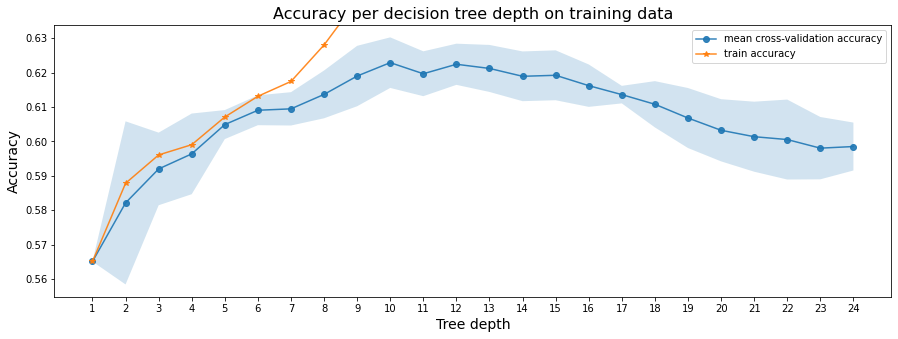

In [20]:
# plotting accuracy
plot_cross_validation(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data', 'Tree depth')

In [21]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-10 tree achieves the best mean cross-validation accuracy 62.29037 +/- 0.36735% on training dataset


,W,L,D,accuracy,macro avg,weighted avg
precision,0.424908,0.577034,0.645409,0.62452,0.549117,0.609070
recall,0.079725,0.411403,0.814085,0.62452,0.435071,0.624520
f1-score,0.134259,0.480341,0.720000,0.62452,0.444867,0.600737
support,1455.000000,13155.000000,18971.000000,0.62452,33581.000000,33581.000000


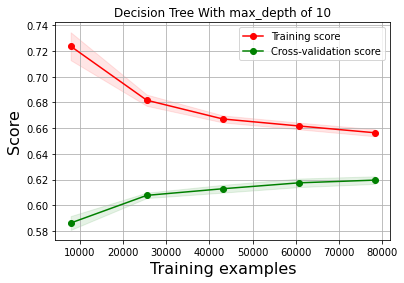

In [23]:
clf = DecisionTreeClassifier(max_depth=sm_best_tree_depth)
clf.fit(X_train_transformed,y_train)
y_preds=clf.predict(X_test_transformed)
report = pd.DataFrame(classification_report(y_test,y_preds,target_names=['W','L','D'],output_dict=True))
MODELS['Tree'] = report['accuracy'][0]
plot_learning_curve(clf,f'Decision Tree With max_depth of {sm_best_tree_depth}',nX,ny,cv=ShuffleSplit(test_size=TEST_SIZE))
report

### Random Forest

In [24]:
# fitting trees of depth 3 to 14
sm_tree_depths = range(3,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_random_forest(X_train_transformed, y_train, sm_tree_depths)

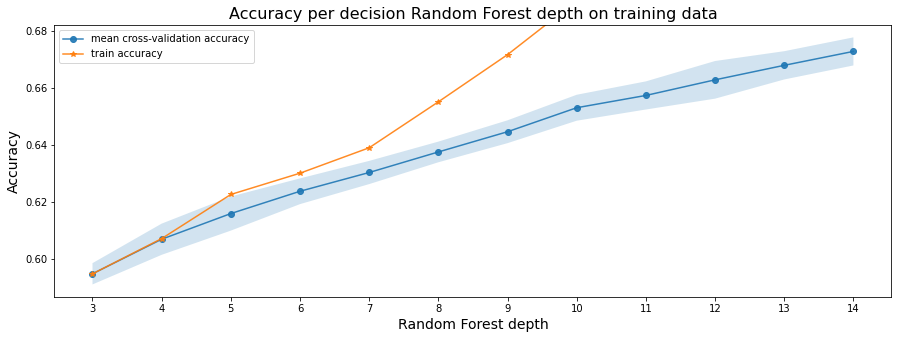

In [25]:
# plotting accuracy
plot_cross_validation(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision Random Forest depth on training data', 'Random Forest depth')

In [26]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_forest_depth = sm_tree_depths[idx_max]
sm_best_forest_cv_score = sm_cv_scores_mean[idx_max]
sm_best_forest_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} Random Forest achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_forest_depth, round(sm_best_forest_cv_score*100,5), round(sm_best_forest_cv_score_std*100, 5)))


The depth-14 Random Forest achieves the best mean cross-validation accuracy 67.27289 +/- 0.24653% on training dataset


,W,L,D,accuracy,macro avg,weighted avg
precision,0.714286,0.678842,0.671139,0.673208,0.688089,0.676026
recall,0.003436,0.463398,0.870065,0.673208,0.445633,0.673208
f1-score,0.006840,0.550802,0.757764,0.673208,0.438469,0.644153
support,1455.000000,13155.000000,18971.000000,0.673208,33581.000000,33581.000000


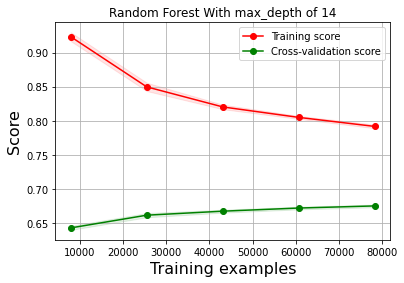

In [27]:
clf = RandomForestClassifier(max_depth=sm_best_forest_depth)
clf.fit(X_train_transformed,y_train)
y_preds=clf.predict(X_test_transformed)
report = pd.DataFrame(classification_report(y_test,y_preds,target_names=['W','L','D'],output_dict=True))
MODELS['RandomForest'] = report['accuracy'][0]
plot_learning_curve(clf,f"Random Forest With max_depth of {sm_best_forest_depth}",nX,ny,cv=ShuffleSplit(test_size=TEST_SIZE))
report

### K Nearest Neighbours

In [28]:
# fitting neighbours of depth 3 to 7
sm_amount_of_neighbours= range(3,8)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_knn(X_train_transformed, y_train, sm_amount_of_neighbours)

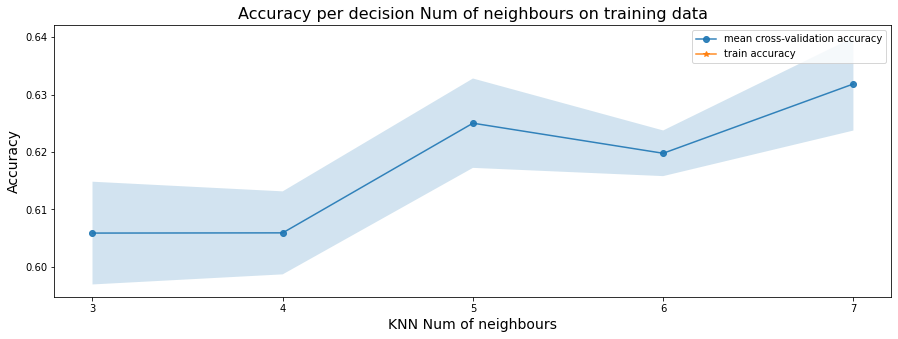

In [29]:
# plotting accuracy
plot_cross_validation(sm_amount_of_neighbours, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision Num of neighbours on training data', 'KNN Num of neighbours')

In [30]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_knn_depth = sm_tree_depths[idx_max]
sm_best_knn_cv_score = sm_cv_scores_mean[idx_max]
sm_best_knn_cv_score_std = sm_cv_scores_std[idx_max]
print('The NN-{} KNN achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_knn_depth, round(sm_best_knn_cv_score*100,5), round(sm_best_knn_cv_score_std*100, 5)))


The NN-7 KNN achieves the best mean cross-validation accuracy 63.18631 +/- 0.40615% on training dataset


,W,L,D,accuracy,macro avg,weighted avg
precision,0.089552,0.573785,0.678556,0.63667,0.447298,0.611993
recall,0.008247,0.552718,0.743082,0.63667,0.434682,0.636670
f1-score,0.015104,0.563054,0.709354,0.63667,0.429171,0.621962
support,1455.000000,13155.000000,18971.000000,0.63667,33581.000000,33581.000000


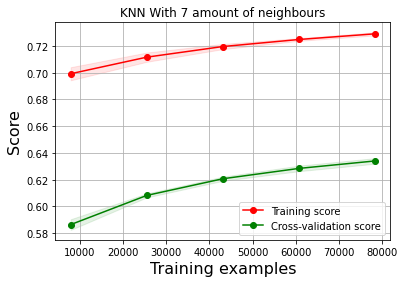

In [31]:
clf = KNeighborsClassifier(n_neighbors=sm_best_knn_depth)
clf.fit(X_train_transformed,y_train)
y_preds=clf.predict(X_test_transformed)
report = pd.DataFrame(classification_report(y_test,y_preds,target_names=['W','L','D'],output_dict=True))
MODELS['KNN'] = report['accuracy'][0]
plot_learning_curve(clf,f"KNN With {sm_best_knn_depth} amount of neighbours",nX,ny,cv=ShuffleSplit(test_size=TEST_SIZE))
report

### Support Vector Machine

In [ ]:
svm_model = svm.SVC(kernel='linear') # Linear Kernel
svm_model.fit(X_train_transformed, y_train)
C_s = [0.1,1,10,100] # List of possible C's
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_svm(svm_model, X_train_transformed, y_train, C_s)

In [ ]:
# plotting accuracy
plot_cross_validation(C_s, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data', 'Tree depth')

In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_svm_depth = sm_tree_depths[idx_max]
sm_best_svm_cv_score = sm_cv_scores_mean[idx_max]
sm_best_svm_cv_score_std = sm_cv_scores_std[idx_max]
print('The C-{} SVM achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_svm_depth, round(sm_best_svm_cv_score*100,5), round(sm_best_svm_cv_score_std*100, 5)))


In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.C = sm_best_svm_depth
clf.fit(X_train_transformed,y_train)
y_preds=clf.predict(X_test_transformed)
report = pd.DataFrame(classification_report(y_test,y_preds,target_names=['W','L','D'],output_dict=True))
MODELS['SVM'] = report['accuracy'][0]
plot_learning_curve(clf,f"SVM With {sm_best_svm_depth} amount in C",nX,ny,cv=ShuffleSplit(test_size=TEST_SIZE))
report

### Best Model

<BarContainer object of 4 artists>

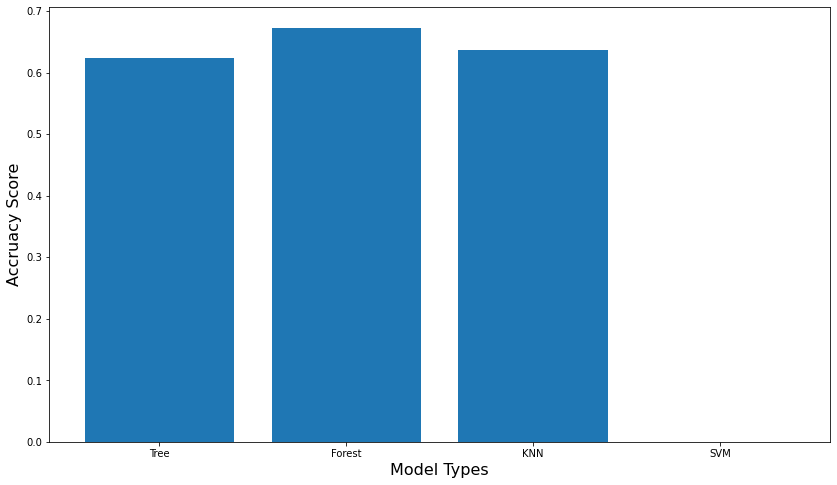

In [15]:
 # need to look at MODELS and draw graph
fig=plt.figure(figsize=(14,8),)
plt.xlabel('Model Types',size=16)
plt.ylabel('Accruacy Score',size=16)
keys = MODELS.keys()
values = MODELS.values()
plt.bar(keys,values,figure=fig)

## Appendix

Its possible to test the rest of the paramters with grid search / random search

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:


In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 110, num = 10)]
# Number of features to consider at every split
##max_features = ['auto', 'sqrt']
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 13, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
min_samples_split = [2]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
min_samples_leaf = [4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, None],
 'max_features': ['auto'],
 'min_samples_leaf': [4],
 'min_samples_split': [2],
 'n_estimators': [100, 101, 102, 103, 104, 105, 106, 107, 108, 110]}


In [14]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_transformed, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.7min finished


{'n_estimators': 102,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

Now we can also try Grid Search with Cross Validation

GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

This will try out 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings. We can fit the model, display the best hyperparameters, and evaluate performance:

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_